<a href="https://colab.research.google.com/github/plubberrs/A-layman-s-guide-to-Manim/blob/main/manim_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plub's guide to Manim: on Colab

FAQs:
- What is Colab and why use it?

Basically Google python, with some very good tools. It uses its own separate RAM and storage, so don't worry about whether your computer can run the code. Useful, popular python libraries e.g. numpy, tensorflow are pre-installed, which saves you a lot of time. While the free version of Colab is already very useful, there's also an option to pay/subscribe to Colab pro, which will increase RAM and storage size and provide more tools e.g. the terminal.

Colab is different from how PyCharm or Visual Studio Code works. It is not an "IDE" like those two, rather it is a hosted "Jupyter Notebook" service. 

- What is Manim?

Manim is a python-based engine for animating explanatory math videos, first developed by 3B1B (the version is called ManimGL). The version commonly used now is developed by his community instead (called ManimCE). It has very beautiful animations, and loads of tools for math animating which makes your life a lot easier compared to using real animation softwares (especially mine, I cannot draw).

- What is this guide?

I will walk you through doing basic stuff with Manim on Google Colab, then you can find out more at the [official documentation](https://docs.manim.community/en/stable/). A lot of the explanations I give here will not be technical, e.g. how `class` strutures actually work. This is because I want to show you that codes are supposed to be read like human languages.

**My personal tip:**

**Real programming is not a compsci class! You will not understand how every line of code works. Only 3B1B's lead developers might, and they are all senior programmers with 10yrs+ of experience. But you will start to pick up on little things as you copy/paste stuff from here and try running it. IMO, the best approach to programming is to try it then learn it, not the other way round.**

**If you desperately want to know how harder things work, visit the official documentation or GOOGLE IT. A guy I know used to say that a programmer's salary depends on how well they can Google search. Trustworthy sources for answering Manim-related questions are StackOverflow (of course), [Discussions on GitHub](https://github.com/ManimCommunity/manim/discussions), and the [official Discord server](https://discord.gg/JMj4TMb3).**

If a code block are ran correctly, there will be a video in the output shell of the block. You can find or download these output videos by clicking the folder button on the left hand side tab (4th from the top) and go to media/videos/content/1080p60.

## Installations

If you try and install Manim on colab by yourself, you will have a very hard time. I highly suggest you ignore how things work in this section, and just run everything for now.

In [ ]:
# <-- click the play button to run the code
# this block of code will install everything you need
# if you want to use manim on your own Colab notebook, copy everything here
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

^^^ After the shell above is ran, click `RESTART RUNTIME` to enable the newly-installed packs

In [ ]:
# import the Manim library
from manim import *

In [ ]:
# Run an example code to test if imported successfully
%%manim -pqh -v WARNING test

class test(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

## Getting started: Shapes

### Your first scene

Let's create your first scene. Try running the code below:

In [ ]:
%%manim -pqh -v WARNING SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle() # create a circle
        circle.set_fill(color=PINK, opacity=0.5)  # set the color and opacity
        self.play(Create(circle))  # show the circle on screen

You should be creating a pink circle...if yes, then congratulations on your first ever Manim scene! 

Let's break down some of the codes here:

- `SquareToCircle()` is, in python terms, something called a `class`. Classes are like big boxes where you dump everything related to them inside. In our case, everything you want in an animation called `SquareToCircle` is in the class. Inside the bracket, we specify that we want to run this animation on a blank space called `Scene`.
- In the class, we have a function `construct()`. Like what its name implies, it creates your animation on `Scene`. We want it to construct...well...its own class, so we might think of specifying `SquareToCircle` inside the bracket of the function, however to avoid mentioning a class's name while in the class, we instead use a special keyword `self` to refer to the class while we're in it.
- `circle = Circle()` creates a circle object called `circle`.
- `set_fill()` specifies the object's attributes so that its `color` is `PINK` and it has an `opacity` value of `0.5`.
- `self.play()` means that the `construct` function tells the class itself to `play()` the animation. In this case, we want it not just to stick `circle` on screen like a powerpoint, but show the creation animation, so we use `Create(circle)` as our animation.

The first line of code, as you might have noticed, looks different from the rest. This is because it is not written in python! They are Manim's "command line arguments". I will explain later what these are and how you can use them, but what you need to know now is that they are what makes the whole thing run.

### Some spice

Lets add more stuff to our scene...

In [ ]:
%%manim -pql -v WARNING SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(color=PINK, opacity=0.5)  # set color and transparency

        square = Square()  # create a square
        square.rotate(PI/4)  # rotate by PI/4 radians counterclockwise

        self.play(Create(square))  # animate the creation of the square
        self.play(ReplacementTransform(square, circle))  # transform the square into the circle
        self.play(FadeOut(circle))  # fade out animation

The transition from square to circle is really smooth!

Some more code breakdowns:

- We create a circle and set its attributes like the previous example.
- `square = Square()` creates a square object called `square`.
- `rotate()` specifies how many (radians) the object will be tilted when the animation is played. In this case, we want our `square` to tilt by `PI/4` radians (counterclockwise), which tilts it into a diamond.
- `self.play()` works like before, but instead this time we want the specified animation to be `Create(square)`, which shows the creation animation of our tilted square. 
- `ReplacementTransform(square, circle)` does exactly what its name suggested, which is morphing our square into our circle. Of course, this animation also is wrapped in `self.play()`.
- Finally, `FadeOut(circle)` fades out the circle.

**Congratulations! You now know how to make simple shapes!**

Some helpful notes:

- A list of all geometric shapes in Manim and their guides are [here](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.html), if you want to try some more shapes.

- `FadeOut()` animation is actually the counterpart of `FadeIn()` animation. I'll let you guess what this one does...

- Similarly, `Create()` animation also has its counterpart, `Uncreate()`. Again, I'll let you guess...

*Try now (just copy/paste my code into your own colab file and change it up a bit)* 

- *Animate a 'creation' of a blue square using `color=BLUE` and `Create()`.*
- *Transform your blue square into a pink circle, then fade out.*

**When you run an animation on your own Colab file, the first line goes into this pattern: `%%manim -pqh -v WARNING {your class name}`.**

## Texts

### General text stuffs

You can also display text and equations. In Manim, usually I use three text creation methods.

Try and compare them to each other below:

In [ ]:
%%manim -pqh -v WARNING text_example

class text_example(Scene):
    def construct(self):
        # normal, microsoft-word-ish texts
        text = Text('Hello world', color=YELLOW)
        text.scale(2)
        self.play(Write(text))
        self.wait()

In [ ]:
%%manim -pqh -v WARNING mathtex_example

class mathtex_example(Scene):
    def construct(self):
        # Manim will treat this like a math equation...think of how you type in Desmos
        text = MathTex('f(x) = x^2', color=YELLOW)
        text.scale(2) 
        self.play(Write(text))
        self.wait()

In [ ]:
%%manim -pqh -v WARNING tex_example

class tex_example(Scene):
    def construct(self):
        # mix of the first two
        text = Tex('The function $f(x) = x^2$', color=YELLOW)
        text.scale(2) 
        self.play(Write(text))
        self.wait()

Discussions about the text types:

The way I think about it, `Text()` and `MathTex()` are specifically made for texts and math equations, respectively. However, occasionally there is a need to put normal texts and equations in the same line, and that's where `Tex()` comes in. When using `Tex()`, you need to tell Manim which part is a normal text and which part is an equation. You do this by adding `$` at the start and the end of your equation.



Code breakdowns:

- As discussed, `Text()`, `Tex()`, and `MathTex()` are all different ways to create texts. Inside the bracket, type in your message. FYI, in this animation the variable name for the object is `text`.
- `scale()` scales your object by a certain scale factor. In this animation our text is scaled by `3`.
- The animation `Write(text)` makes it look like someone is writing your `text`. Once again, because it's an animation function, it is wrapped inside `self.play()`.
- `self.wait()` makes the animation wait for a certain amount of time. Inside the bracket you can specify the number of seconds you want it to wait. If you don't specify, it will wait for 1 second. 

### LaTeX

Here is how you would animate writing the quadratic formula in Manim:

In [ ]:
%%manim -pqh -v WARNING MoreMathTex

class MoreMathTex(Scene):
    def construct(self):
        eqn = MathTex("x = \\frac{- b \\pm \\sqrt{b^2 - 4ac}}{2a}") # This is "LaTeX"
        eqn.scale(2)
        self.play(Write(eqn))
        self.wait()

"What is this weird Equation typing language??", You asked.

They are written in something called "LaTeX". You don't need to know LaTeX by heart, but occasionally you would need to type a weird symbol like an integral sign ( $\int$ ). When that time comes, browse [here](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) to find out how to type math symbols.

In this example:

- Type `\\frac{}{}` for fractions. The numerator goes into the first bracket, and the denominator goes into the second.
- `\\pm` is the plus-or-minus sign.
- Put whatever you want to square root inside the brackets of `\\sqrt{}`

**For more on texts, visit [this link](https://docs.manim.community/en/stable/reference/manim.mobject.svg.text_mobject.html) for all things `text` and [this link](https://docs.manim.community/en/stable/reference/manim.mobject.svg.tex_mobject.html) for all things `tex`.**

## Positionings

### Basic positionings

So far we have learnt how to create shapes and texts, but what if we want to position them somewhere?

In [ ]:
%%manim -pqh -v WARNING CircleMove

class CircleMove(Scene):
    def construct(self):
        circle1 = Circle().set_fill(color=PINK, opacity=0.5) # merge two commands together
        circle2 = Circle().set_fill(color=GREEN, opacity=0.5)
        circle2.move_to(RIGHT * 3 + UP * 2) # move 3 units right and 2 units up

        self.play(Create(circle1))
        self.wait()
        self.play(Create(circle2))
        self.wait()

The center of `circle1` is still in the middle of the canvas, since I haven't move it anywhere. However, you can see that the center of `circle2` moved 3 units to the right and 2 units upwards.

Code breakdowns:

- Instead of writing two lines, `circle1 = Circle()` and `circle1.set_fill()`, you can actually merge them together into one line like above. Pretty convenient, right?
- `move_to()` moves your object somewhere. In this case, we moved `circle2` 3 units to the right and 2 units upwards.

What if you want to position objects by the edges or the corners of the canvas?

In [ ]:
%%manim -pqh -v WARNING CircleEdge

class CircleEdge(Scene):
    def construct(self):
        circle1 = Circle().to_edge(UP) # move to top edge
        circle2 = Circle().to_corner(UR, buff=SMALL_BUFF) # move to top right corner with a small buff
        circle3 = Circle().to_corner(DL, buff=LARGE_BUFF) # move to bottom left corner with a large buff

        self.play(Create(circle1))
        self.wait()
        self.play(Create(circle2))
        self.wait()
        self.play(Create(circle3))
        self.wait()

There's a bit more going on in this example...

- `to_edge()` moves your object to the edges of the canvas. Inside the bracket, type `UP`, `DOWN`, `RIGHT`, and `LEFT` to move it accordingly.
- `to_corner()` moves your object to the corners of the canvas. Inside the bracket, type `UR` for top right, `UL` for top left, `DR` for bottom right, and `DL` for bottom left corner.
- In these two methods, another thing you can specify is the *distance between the object and the edges/corners*. This is called `buff` in Manim. You can set the buff with integers, or you can use these four; `SMALL_BUFF`, `MED_SMALL_BUFF`, `MED_LARGE_BUFF`, and `LARGE_BUFF`. If not specified, Manim will automatically go with `MED_LARGE_BUFF`. 

### Grouping things together

This will be your first long example...brace yourself, because I will be cranking up the difficulty!

In [ ]:
%%manim -pqh -v WARNING CircleToEllipse

class CircleToEllipse(Scene):
    def construct(self):
        # All the shapes are here
        circle = Circle().set_fill(color=RED, opacity=0.5)
        ellipse = Circle().set_fill(color=RED, opacity=0.5).stretch(2, dim=0)
        line = Line(start=(-1, 0, 0), end=(1, 0, 0)).set_stroke(color=RED)
        dot1 = Dot((-1, 0, 0), color=YELLOW)
        dot2 = Dot((1, 0, 0), color=YELLOW)

        # All the labels are here
        circle_label = Text("Circle", color=GREEN).next_to(circle, UR, buff=MED_SMALL_BUFF)
        ellipse_label = Text("Ellipse", color=GREEN).next_to(ellipse, UR, buff=MED_SMALL_BUFF)
        lines_dots_label = Text("Lines and Dots", color=GREEN).next_to(line, UP, buff=LARGE_BUFF)

        # Grouping
        circle_group = VGroup(circle, circle_label)
        ellipse_group = VGroup(ellipse, ellipse_label)
        lines_dots_group = VGroup(line, dot1, dot2, lines_dots_label)

        # Actual animation playing
        self.add(circle, circle_label)
        self.wait()
        self.play(ReplacementTransform(circle_group, ellipse_group), run_time=2)
        self.wait()
        self.play(FadeOut(ellipse_group))
        self.play(FadeIn(lines_dots_group))
        self.wait()

The code here is quite long, so you might not know where to start reading at first glance. My trick is to first read the animation playing codes at the bottom to get a vague idea of what's going on, then watch the video output. After that, start looking at the code for shapes and texts to get the details. Lastly, look at the grouping of objects.

New things:

- `stretch()` stretches your object by a certain factor, along a certain axis. In the example the circle is stretched by a factor of `2` along the x-axis, `dim=0`. If you want the y-axis, you can do `dim=1` instead. 
- `Line()` creates a line. Our line starts at the coordinates (-1, 0, 0) and ends at (1, 0, 0).
- `Dot()` creates a point at a specified coordinate inside the bracket.
- `next_to()` places your object next to another existing object. In the example, the label for the circle is placed next to it in the top right side `UR` with a buff of `MED_SMALL_BUFF`.
- `VGroup()` is a sneaky way to group things together so that you have a slightly easier time writing the animation part of your code. In this example, `circle_group` groups `circle` and `circle_label` together.
- Inside `self.play()` you can also set the animation duration in seconds, using `run_time`.
- It's a little weird that I haven't introduced this before, but `self.add()` simply adds objects to the canvas without any animation.

**Now you have some more things to play with and some more experience coding, you should be able to do some pretty amazing things!**

*Try now:*
- *Create a red circle, place a dot at its center, and create + label the radius $r$ for the circle. Then, use `Tex()` to write "$Area = \pi r^2$" next to the circle's top right side (to write $\pi$, type `\\pi`).*

**When you run an animation on your own Colab file, the first line goes into this pattern: `%%manim -pqh -v WARNING {your class name}`.**

## Coordinate systems & Graphs

### Coordinate systems

Next, we will look at Manim's coordinate systems. One important thing that you need to understand is that when you use Manim's axes or numberplanes, there will be (mainly) 2 different ways to use coordinates in Manim.

- Coordinates relative to *your main animation canvas*. The `RIGHT`, `LEFT`, `UP`, and `DOWN` we've been using with the `move_to()` method counts as this.
- Coordinates relative to *the axes you created*. You navigate around using vectors.

This concept might be a bit hard to grasp, so let's try the example below:

In [ ]:
%%manim -sqh -v WARNING CoordsToPointExample

class CoordsToPointExample(Scene):
    def construct(self):
        ax = Axes().add_coordinates()

        # a dot with respect to the axes
        dot_axes = Dot(ax.coords_to_point(2, 2), color=GREEN)
        lines = ax.get_lines_to_point(ax.c2p(2,2))

        # a dot with respect to the scene
        # the default plane corresponds to the coordinates of the scene.
        plane = NumberPlane()
        dot_scene = Dot((2,2,0), color=RED)

        self.add(plane, dot_scene, ax, dot_axes, lines)

FYI, if you only write and animate a class without any actual animations, Manim would output a picture.

In the example, the green dot is at the coordinates (2, 2) relative to the axes `ax`, while the red dot is at the coordinates (2, 2) relative to the Manim scene (canvas).

- `Axes()` creates a set of 2D axes, and `add_coordinates()` does exactly what its name suggests.
- Inside the brackets of `Dot()`, put a normal `(x, y, z)` coordinates to use the coordinate system relative to the scene, and put `ax.coords_to_point(x, y, z)` or `ax.c2p(x, y, z)` to use the coordinate system relative to `ax`.
- `get_lines_to_point()` draw dashed lines from the axes to the coordinates specified inside the bracket. This works with the `c2p()` coordinates method, not the normal one.
- `NumberPlane()` creates a 2D number plane. The default number plane use the same set of normal coordinates as the Manim scene, but you can also use the `c2p()` coordinates method.

### Axes configuration

What if you want your axes to show only the first quadrant (+x, +y)? What if you want to change the length or the thickness of the lines? What if you want a green axes? Let's look at how you can configure your axes.

But first, you need to introduce yourself to "dictionaries" (or in Java, "hashmaps"). It looks like this:
```python
Plub_dict = {"name": "Plub", "age": 15, "school": "Harrow"}
```
This thing really works like a vocab dictionary. Whenever I say `Plub_dict["name"]`, python will look into the dictionary called `Plub_dict` and find whatever corresponds to `"name"`, which in this case is `"Plub"`.

So, when you see
```python
axis_config = {"color": GREEN}
```
You know that this is a dictionary, one which tells Manim that `"color"` of the axis is `GREEN`.

Now, try the example below:

In [ ]:
%%manim -sqh -v WARNING AxesConfig

class AxesConfig(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2)
            },
            tips=False,
        )

        self.add(axes)

As you can see, there are multiple things you can do with your axes.

- `x_range` and `y_range` specify the ranges (in numbers) of your x-axis and y-axis respectively. It takes in a list of real numbers in the pattern `[start, end, steps]`. In the example, the x-axis starts at -10, ends at 10.3, and is ticked every 1.
- `x_length` and `y_length` specify the length of your x-axis and y-axis respectively. In this example, the x-axis has a length of 10 units (relative to the main Manim coordinate system, and not the axes!).
- `axis_config` allows you to configure the whole axes, while `x_axis_config` and `y_axis_config` only configure their own axis. `"numbers_to_include"` wants a list of all numbers you want the axes to display, and `"numbers_with_elongated_ticks"` wants a list of all the numbers you want to have bigger ticks than normal.
- `np.arange(start, end, step)` is a little complicated. But essentially, it would be tiring to type in a whole lot of numbers you want displayed on your axes. In the example above, you don't want to spend time typing `[-10, -8, -6, ..., 6, 8, 10]`. So, you would use `np.arange(-10, 10.01, 2)` which means the you want the list containing every number from -10 to just before 10.01, counting every 2.
- `tips` check whether you want arrows for your axes. This can be set using `True` or `False`.


**Programmer tip:**
```python
x_axis_config={"numbers_to_include": np.arange(-10, 10.01, 2), "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2)}
```
**and**
```python
x_axis_config={
      "numbers_to_include": np.arange(-10, 10.01, 2),
      "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2)
      }
```
**means the exact same thing. The second way is used for when you have a lot of code to put in, it just looks more clean and readable.**

**If you want more on coordinate systems, the official documentation is [here](https://docs.manim.community/en/stable/reference/manim.mobject.coordinate_systems.html).**

### Graphs

Manim has a very neat and easy way to draw graphs. To do that, you need to write functions in programmers' ways, namely by using `lambda` and `def`. Here are some examples:

Math: $f(x) = x + 1$

Lambda: `lambda x: x + 1`

Def: 
```python
def func(x):
    return x + 1
```

Math: $f(x) = x^2 - 2$

Lambda: `lambda x: x**2 - 2`

Def:
```python
def func(x):
    return x**2 - 2
```

Once you see the pattern, you're ready to graph on Manim.

In [ ]:
%%manim -pqh -v WARNING GraphExample

class GraphExample(Scene):
    def construct(self):
        ax = Axes().add_coordinates()

        # Using `def`
        def func(x):
            return x + 1
            
        linear_graph = ax.get_graph(func, color=RED)
        linear_label = ax.get_graph_label(linear_graph, "f(x) = x + 1")

        # Using `lambda`
        quad_graph = ax.get_graph(lambda x: x**2 - 2, color=GREEN)
        quad_label = ax.get_graph_label(quad_graph, "g(x) = x^2 - 2", x_val=0, direction=DR)

        self.add(ax)
        self.play(Create(linear_graph), Write(linear_label), run_time=2)
        self.wait()
        self.play(Create(quad_graph), Write(quad_label), run_time=2)
        self.wait()

- `ax.get_graph()` creates a graph using the coordinates relative to `ax`.
- `ax.get_graph_label()` creates a label for the graph specified inside the bracket, relative to `ax`. You can also specify the x-coordinate position of the label with `x_val` and the direction from that position with `direction`; `UP`, `DOWN`, `RIGHT`, `LEFT`, `UR`, `UL`, `DR`, and `DL`. In the example, the label for the quadratic graph is positioned bottom-right to where $x = 0$.
- `self.play()` can actually play two or more animations at once!

### Parametric graphs

You might wonder, what if you want to graph a circle? Things like

$$x^2 + y^2 = 1$$

can't really be written using `def` or `lambda`.

Here is where "parametric functions" come in. Instead of defining a function in terms of $y$'s relationship with $x$, we defining a parametric function by creating a new, common variable e.g. $t$ for time, then define $x$ and $y$'s relationship with $t$. To demonstrate, we can define a parametric function like so:

$$x(t) = \cos{t}$$
$$y(t) = \sin{t}$$

This means that as a graph, your x-coordinate progresses by $\cos{t}$ and your y-coordinate progresses by $\sin{t}$.

**(To my Y11 school friends: parametric functions are in A-level Maths Pure 4, so good job if you get it!)**

In `def` and `lambda` form, you might write this like:
```python
lambda t: np.array([
    np.cos(t),
    np.sin(t),
    0
])
```
or
```python
def func(t):
    return np.array([
        np.cos(t),
        np.sin(t),
        0
    ])
```

The example below helps you graph a circle as a parametric function:

In [ ]:
%%manim -pqh -v WARNING ParametricExample

class ParametricExample(Scene):
    def construct(self):
        plane = NumberPlane()

        # Parametric function using `def`
        def CircleFunc1(t):
            return np.array([np.cos(t), np.sin(t), 0])
        
        circle1 = ParametricFunction(
            CircleFunc1, 
            t_range = [0, 2*PI, 0.01],
            color=BLUE
        )

        # Parametric function using `lambda`
        CircleFunc2 = lambda t: np.array([2*np.cos(t), 2*np.sin(t), 0])
        circle2 = ParametricFunction(
            CircleFunc2,
            t_range = [0, 2*PI, 0.01],
            color=YELLOW
        )

        self.add(plane)
        self.play(Create(circle1), run_time=2)
        self.wait()
        self.play(Create(circle2), run_time=2)
        self.wait()

Here are our circles graphed!

- `ParametricFunction()` defines you a parametric function. Inside the bracket you need 2 essential things; the function itself (written using `def` or `lambda`), and `t_range` (how far you want `t` to go, written in the pattern `[start, end, step]`. In this example, $\sin{t}$ and $\cos{t}$ both have a period of $2\pi$, so `t` starts from 0, ends at $2\pi$, **and samples every 0.01 (important! This is what determines the "smoothness" of your graph. You need this to be a small number!)**

**Congratulations for making it this far! You will hopefully gotten very good at reading codes at this point. The official documentation for `ParametricFunction` is [here](https://docs.manim.community/en/stable/reference/manim.mobject.functions.ParametricFunction.html#manim.mobject.functions.ParametricFunction).**

*Try now:*

- Graph $f(x) = 0.5x^2 + x - 3$ on either `Axes()` or `NumberPlane()`. Then, use `Dots()` to label the two real roots and display their coordinates using `MathTex()`.
- Graph, using `ParametricFunction`,

$$x(t) = (1 + \cos{5t})(\cos{t})$$
$$y(t) = (1 + \cos{5t})(\sin{t})$$

**When you run an animation on your own Colab file, the first line goes into this pattern: `%%manim -pqh -v WARNING {your class name}`.**

## Animations

### Basic animations

Let's recap some things and explore some new animation functions...

In [ ]:
%%manim -pqh -v WARNING PointMovingOnShapes

class PointMovingOnShapes(Scene):
    def construct(self):
        circle = Circle(radius=1, color=BLUE)
        dot = Dot()
        dot2 = dot.copy().shift(RIGHT)
        self.add(dot)

        line = Line([3, 0, 0], [5, 0, 0])
        self.add(line)

        self.play(GrowFromCenter(circle))
        self.play(ReplacementTransform(dot, dot2))
        self.play(MoveAlongPath(dot2, circle), run_time=2)
        self.play(Rotating(dot2, about_point=[2, 0, 0]), run_time=1.5)
        self.wait()

- `dot2 = dot.copy()` is very sneaky. This code copies whatever `dot` is into `dot2`.
- `GrowFromCenter()` creates your object by growing it from its center.
- `MoveAlongPath()` moves the first object you put into its bracket along the path of the second object you put into its bracket.
- `Rotating()` rotates your object about a specified coordinate.

### Rate functions

What if you want to control not only the animation duration, but its rate too? What I mean by rate is that, for example, you might want the animation to play slowly at first, then speeds up, then slows down at the end.

In [ ]:
%%manim -pqh -v WARNING RateFunctionsExample

class RateFunctionsExample(Scene):
    def construct(self):
        line1 = Line(3*LEFT, 3*RIGHT).shift(UP).set_color(RED)
        line2 = Line(3*LEFT, 3*RIGHT).set_color(GREEN)
        line3 = Line(3*LEFT, 3*RIGHT).shift(DOWN).set_color(BLUE)

        dot1 = Dot().move_to(line1.get_left())
        dot2 = Dot().move_to(line2.get_left())
        dot3 = Dot().move_to(line3.get_left())

        label1 = Tex("Linear").next_to(line1, RIGHT)
        label2 = Tex("Smooth").next_to(line2, RIGHT)
        label3 = Tex("There and Back").next_to(line3, RIGHT)

        self.play(
            FadeIn(VGroup(line1, line2, line3)),
            FadeIn(VGroup(dot1, dot2, dot3)),
            Write(VGroup(label1, label2, label3)),
        )
        self.play(MoveAlongPath(dot1, line1, rate_func=linear), run_time=2)
        self.play(MoveAlongPath(dot2, line2, rate_func=smooth), run_time=2)
        self.play(MoveAlongPath(dot3, line3, rate_func=there_and_back), run_time=2)
        self.wait()

- `line1.get_left()` fetches whatever coordinates are for `line1`'s most leftward point.
- `rate_func` can be specified like above, and you will get the results as displayed in the video. The three main rate functions that I use are `linear`, `smooth`, and `there_and_back`.

### Using `animate` and `ApplyMethod`

In your animation, if you want to move things, you might do something like this:

```python
circle1 = Circle()
circle2 = Circle().move_to(RIGHT)

self.play(Create(circle1))
self.play(ReplacementTransform(circle1, circle2))
```

This works, but there's a problem. What if you want to move your circle 10 times? Creating 10 circles might potentially be quite a strain on your processing time. Which means, this code is not very optimised ~~and you don't wanna end up like YandereDev~~. Here I will show you some of the better ways to animate:

In [ ]:
%%manim -pqh -v WARNING MoveExample

class MoveExample(Scene):
    def construct(self):
        square = Square().set_fill(color=WHITE, opacity=0.5)

        self.play(Create(square))
        self.wait()
        # Move around a lot
        self.play(ApplyMethod( square.move_to, (2, 2, 0) ), run_time=0.5)
        self.play(ApplyMethod( square.move_to, (2, -2, 0) ), run_time=0.5)
        self.play(ApplyMethod( square.move_to, (-2, -2, 0) ), run_time=0.5)
        self.play(ApplyMethod( square.move_to, (-2, 2, 0) ), run_time=0.5)
        self.play(ApplyMethod( square.move_to, ORIGIN ), run_time=0.5)
        self.wait()
        # Set fill color
        self.play(square.animate.set_fill(color=RED))
        self.play(square.animate.set_fill(color=BLUE))
        self.play(square.animate.set_fill(color=YELLOW))
        self.play(square.animate.set_fill(color=GREEN))
        self.wait()

How convenient! We just turned `move_to()` and `set_fill()`, which are normally non-animation functions, into animations!

When you use apply method, be careful of how you use it...here is a comparison of `move_to` as a function vs. as an `ApplyMethod` animation:

- `square.move_to( (2, 2, 0) )`

- `ApplyMethod( square.move_to, (2, 2, 0) )`

You can see the coordinates that was inside `move_to()`, when we use `ApplyMethod`, it migrates. However, using `animate` does not really change the syntax of the code much.

You can almost use these two interchangably when animating methods.

### Using `ValueTracker` and updaters

Here is a way to animate more ambitious and sophisticated animations:

In [ ]:
%%manim -pqh -v WARNING MovingDots

class MovingDots(Scene):
    def construct(self):
        # shapes
        d1, d2 = Dot(color=BLUE), Dot(color=GREEN).shift(RIGHT)
        line = Line(d1.get_center(), d2.get_center()).set_color(RED)

        # `ValueTracker`s
        x_tracker = ValueTracker(0)
        y_tracker = ValueTracker(0)
        
        # updaters
        d1.add_updater(
            lambda z: z.set_x( x_tracker.get_value() )
        )

        d2.add_updater(
            lambda z: z.set_y( y_tracker.get_value() )
        )

        line.add_updater(
            lambda z: z.become(
                Line(d1.get_center(), d2.get_center())
            )
        )
        
        # animate by changing the value of two `ValueTracker`s
        self.add(d1,d2,line)
        self.play(x_tracker.animate.set_value(5))
        self.play(y_tracker.animate.set_value(3))
        self.play(x_tracker.animate.set_value(-4))
        self.play(y_tracker.animate.set_value(-2))
        self.wait()

- `shift()` shifts an object by some specified amount. In this case it is `RIGHT` or `(1, 0, 0)`.
- `d1.get_center()` returns the coordinates of `d1`'s center.
- In this example, we set `d1`'s x-coordinate and `d2`'s y-coordinate according to the value of `x_tracker` and `y_tracker` respectively. This means that we can "turn the dial" on `x_tracker` and `y_tracker` to animate. This is the use of `ValueTracker`; a value which we can dial up/down at will.
- Inside the bracket of `ValueTracker()` we can specify an initial value that the tracker starts off with.
- `add_updater()` takes in a function (using `lambda` or `def`) which changes an attribute of the object. Here we set the x-coordinate of `d1` to equal to `x_tracker` at any time, and y-coordinate of `d2` to equal to `y_tracker` at any time.
- Then finally, we animate by dialing up/down the trackers using `animate.set_value()`.

**Now the only thing left you need to know is the first line of the code (that I mentioned before about it being "command line arguments"). You have made it so far!**

*Try now:*

- *Animate a swinging pendulum, using `ValueTracker` (to track the angle $\theta$ ) and `add_updater()`. Make it as realistic as possible using `rate_func=there_and_back`. You can animate multiple periods using a `for` loop.*

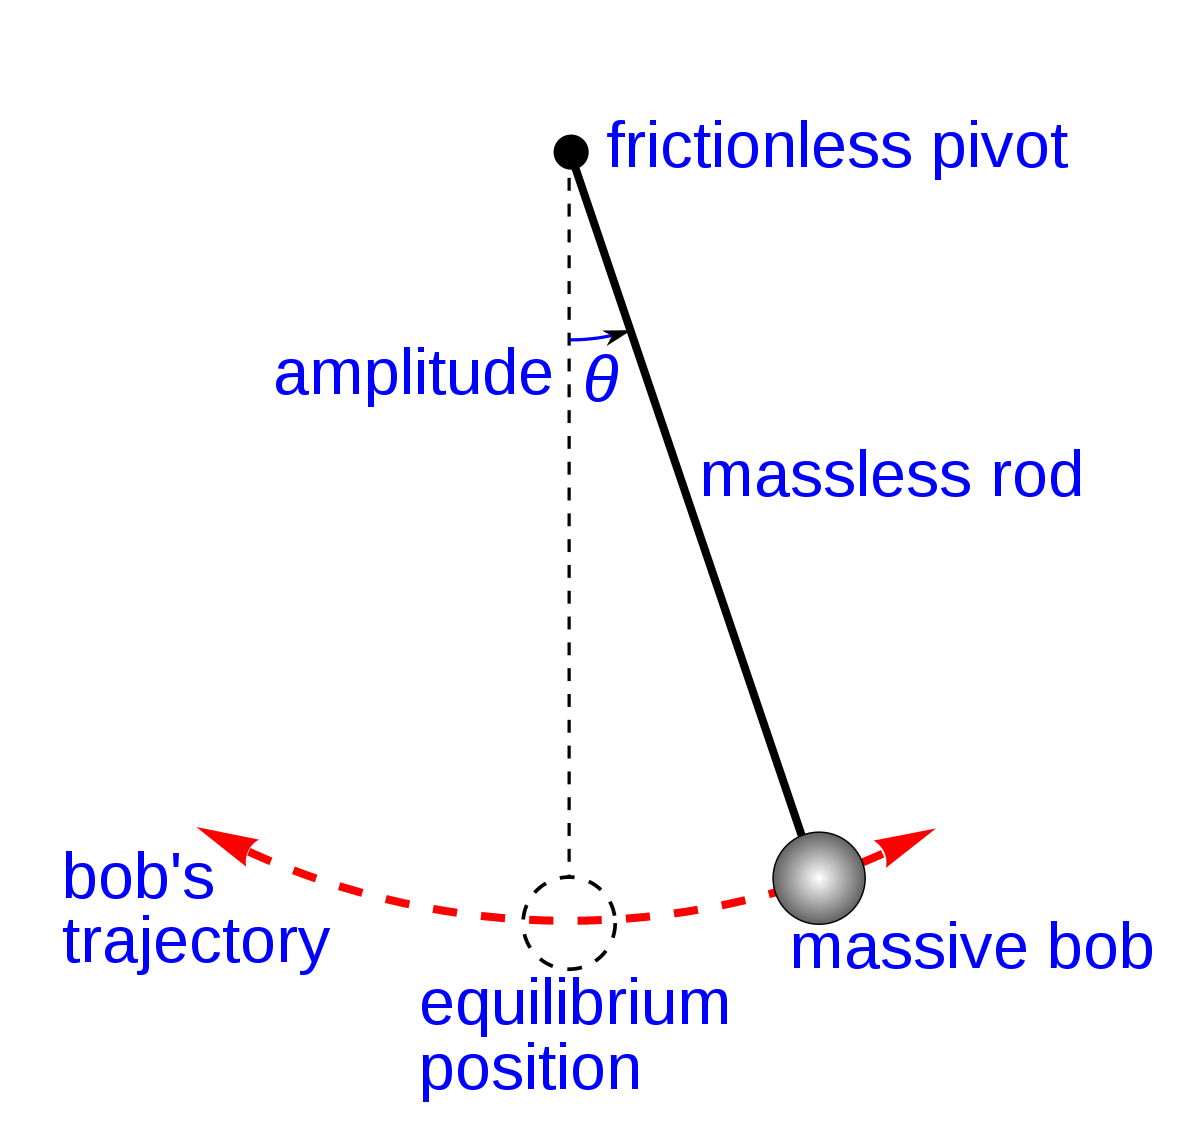

## CLI flags & Rendering options

Lastly, let's look at Manim's command line arguments, a.k.a. the first line of all my code blocks. 

When accessing Manim without running anything, do `%manim` like so:



In [ ]:
%manim --help

When you want to run a scene, do `%%manim {scene name}` like so:

In [ ]:
%%manim SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Notice that there are cryptic codes output before the video comes. You can hide them partially by doing `%%manim -v WARNING {scene name}`. What this means is that `-v` or `--verbose`, what programmers call the cryptic codes, is hidden and will only show themselves when there is a warning or an error.

In [ ]:
%%manim -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

Let's look at rendering:

- If you want to render as video, do `-p`. If you want to render as picture (will snap only the last frame of the animation), do `-s`.
- You can specify the animation quality by doing `-ql` for low, `-qm` for medium, `-qh` for high, and `-qk` for 4K. 

So to combine the two options together, for example, you do `-pqh` to render as high quality video, which is what I've always done.

In [ ]:
%%manim -pqh -v WARNING SquareToCircle

class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

# Footnote

- **Parts of this guide is copied from the official documentation and only paraphrased by myself. The link to the documentation is at the very top.**
- **Please support the Manim Development Team for their amazing work!**